In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

In [2]:

df_num = pd.read_csv('datasets/train_numeric.csv', sep=',', nrows=20000, dtype='float64')
df_cat = pd.read_csv('datasets/train_categorical.csv', sep=',', nrows=20000, dtype='category')
df_num.shape

(20000, 970)

In [3]:
df_cat.shape

(20000, 2141)

In [4]:
df_num.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4.0,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,7.0,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,9.0,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,11.0,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
df_cat.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_num.describe()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
count,20000.000000,11495.000000,11495.000000,11495.000000,11495.000000,11495.000000,11495.000000,11495.000000,11495.000000,11495.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,992.000000,992.000000,992.000000,992.000000,20000.000000
mean,19967.531350,-0.001662,-0.002068,0.002603,0.002419,-0.000254,0.004532,0.000438,0.002568,-0.000855,...,-0.000004,0.000010,0.000031,0.000203,0.000977,-0.000006,0.000007,0.000601,0.000055,0.005600
std,11555.759467,0.080447,0.093357,0.213391,0.213609,0.094330,0.163635,0.019585,0.106054,0.114745,...,0.000062,0.000117,0.000432,0.002170,0.250243,0.000078,0.000145,0.014312,0.000761,0.074625
min,4.000000,-0.363000,-0.429000,-0.397000,-0.397000,-0.404000,-0.566000,-0.044000,-0.232000,-0.393000,...,-0.001000,0.000000,0.000000,0.000000,-0.250000,-0.001000,0.000000,0.000000,0.000000,0.000000
25%,9974.750000,-0.055000,-0.064000,-0.179000,-0.179000,-0.056000,-0.066000,-0.015000,-0.072000,-0.082000,...,0.000000,0.000000,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19924.000000,0.003000,0.004000,-0.033000,-0.034000,0.031000,0.070000,0.000000,-0.032000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30033.500000,0.056000,0.063000,0.294000,0.294000,0.074000,0.116000,0.015000,0.088000,0.076000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40065.000000,0.278000,0.280000,0.567000,0.566000,0.292000,0.206000,0.096000,0.528000,0.393000,...,0.000000,0.002000,0.008000,0.045000,0.250000,0.000000,0.004000,0.441000,0.017000,1.000000


In [7]:
count_targets = df_num.groupby(by='Response')['Id'].count()
count_targets

Response
0.0    19888
1.0      112
Name: Id, dtype: int64

In [8]:
df_cat

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,40057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,40059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,40060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_cat.drop('Id', inplace=True, axis=1)
df_num.drop('Id', inplace=True, axis=1)

In [10]:
df_cat.columns

Index(['L0_S1_F25', 'L0_S1_F27', 'L0_S1_F29', 'L0_S1_F31', 'L0_S2_F33',
       'L0_S2_F35', 'L0_S2_F37', 'L0_S2_F39', 'L0_S2_F41', 'L0_S2_F43',
       ...
       'L3_S49_F4225', 'L3_S49_F4227', 'L3_S49_F4229', 'L3_S49_F4230',
       'L3_S49_F4232', 'L3_S49_F4234', 'L3_S49_F4235', 'L3_S49_F4237',
       'L3_S49_F4239', 'L3_S49_F4240'],
      dtype='object', length=2140)

In [11]:
freq = pd.DataFrame((df_cat.count(axis=0) / df_cat.shape[0]), columns=['segment'])
freq

,segment
L0_S1_F25,0.00010
L0_S1_F27,0.00010
L0_S1_F29,0.00010
L0_S1_F31,0.00010
L0_S2_F33,0.00025
...,...
L3_S49_F4234,0.00000
L3_S49_F4235,0.00000
L3_S49_F4237,0.00000
L3_S49_F4239,0.00000


<AxesSubplot:ylabel='доли непропущенных элементов для каждого столбца'>

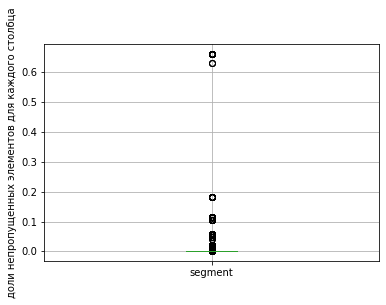

In [13]:
plt.ylabel('доли непропущенных элементов для каждого столбца')
freq.boxplot(column='segment')

In [14]:
important_features = freq['segment'][freq['segment'] > 0.65].index
important_features

Index(['L3_S29_F3317', 'L3_S29_F3320', 'L3_S29_F3323', 'L3_S29_F3326',
       'L3_S29_F3329', 'L3_S29_F3332', 'L3_S29_F3335', 'L3_S29_F3338',
       'L3_S29_F3341', 'L3_S29_F3344', 'L3_S29_F3347', 'L3_S29_F3350',
       'L3_S29_F3353', 'L3_S29_F3356', 'L3_S29_F3359', 'L3_S29_F3362',
       'L3_S29_F3364', 'L3_S29_F3366', 'L3_S29_F3369', 'L3_S29_F3372',
       'L3_S29_F3375', 'L3_S29_F3378', 'L3_S29_F3381', 'L3_S29_F3384',
       'L3_S29_F3387', 'L3_S29_F3390', 'L3_S29_F3392', 'L3_S29_F3394',
       'L3_S29_F3397', 'L3_S29_F3400', 'L3_S29_F3403', 'L3_S29_F3406',
       'L3_S29_F3409', 'L3_S29_F3411', 'L3_S29_F3414', 'L3_S29_F3416',
       'L3_S29_F3418', 'L3_S29_F3420', 'L3_S29_F3423', 'L3_S29_F3426',
       'L3_S29_F3429', 'L3_S29_F3432', 'L3_S29_F3435', 'L3_S29_F3438',
       'L3_S29_F3441', 'L3_S29_F3444', 'L3_S29_F3446', 'L3_S29_F3448',
       'L3_S29_F3451', 'L3_S29_F3454', 'L3_S29_F3457', 'L3_S29_F3460',
       'L3_S29_F3463', 'L3_S29_F3466', 'L3_S29_F3469', 'L3_S29_F3472',
      

In [14]:
important_features.shape

(60,)

In [15]:
df_cat[important_features].agg(axis=0, func=pd.Series.unique)

,L3_S29_F3317,L3_S29_F3320,L3_S29_F3323,L3_S29_F3326,L3_S29_F3329,L3_S29_F3332,L3_S29_F3335,L3_S29_F3338,L3_S29_F3341,L3_S29_F3344,...,L3_S29_F3457,L3_S29_F3460,L3_S29_F3463,L3_S29_F3466,L3_S29_F3469,L3_S29_F3472,L3_S29_F3484,L3_S29_F3487,L3_S29_F3490,L3_S29_F3493
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T1,T1,T1,T1,T1,T1,T1,T1,T1,T1,...,T1,T1,T1,T1,T1,T1,T1,T1,T1,T1


In [16]:

one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(df_cat[important_features].to_numpy())
print(X_categorical.shape)
X_categorical = X_categorical.toarray()
X_categorical

(20000, 120)


array([[0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [17]:
df_num

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
19996,0.023,0.048,0.312,0.330,-0.056,-0.021,0.022,0.048,0.015,-0.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
19997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
19998,-0.075,-0.064,-0.215,-0.197,0.118,-0.066,0.000,-0.032,-0.225,-0.067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
X_numeric = df_num.drop(columns='Response').to_numpy()
X_numeric

array([[ 0.03 , -0.034, -0.197, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [ 0.088,  0.086,  0.003, ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [-0.075, -0.064, -0.215, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan]])

In [19]:
X_numeric.shape

(20000, 968)

In [20]:
X = np.concatenate((X_numeric, X_categorical), axis=1)
X

array([[ 0.03 , -0.034, -0.197, ...,  1.   ,  0.   ,  1.   ],
       [   nan,    nan,    nan, ...,  1.   ,  0.   ,  1.   ],
       [ 0.088,  0.086,  0.003, ...,  0.   ,  1.   ,  0.   ],
       ...,
       [   nan,    nan,    nan, ...,  1.   ,  0.   ,  1.   ],
       [-0.075, -0.064, -0.215, ...,  0.   ,  1.   ,  0.   ],
       [   nan,    nan,    nan, ...,  1.   ,  0.   ,  1.   ]])

In [21]:
y = df_num['Response'].to_numpy()
y

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:

model = XGBClassifier(
            tree_method="gpu_hist",
            enable_categorical=True,
            use_label_encoder=False,
        )


model.fit(X, y)
f_importance = model.feature_importances_
f_importance

[22:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.00710823, 0.00244854, 0.00512137, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [23]:
numeric_f = f_importance[:968]
categorical_f = f_importance[968:]

Text(0.5, 1.0, 'Разброс категориальных признаков по релевантности')

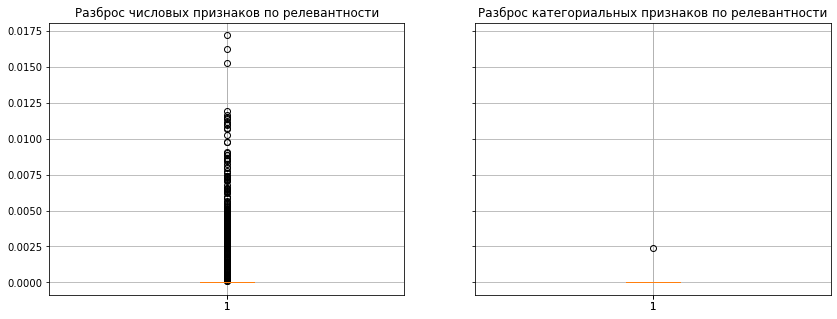

In [24]:

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(14)
axes[0].boxplot(numeric_f)
axes[0].grid()
axes[0].set_title('Разброс числовых признаков по релевантности')

axes[1].boxplot(categorical_f)
axes[1].grid()
axes[1].set_title('Разброс категориальных признаков по релевантности')
#plt.title('Разброс признаков по релевантности')

In [25]:
numeric_f[numeric_f > 0.01].shape

(14,)

In [26]:
m_features = numeric_f.argsort()[::-1][:14]
m_features

array([148, 353, 365, 367,  57,  85,  55,  59,  98,  11, 345, 103, 700,
        84], dtype=int64)

In [27]:
numeric_f[m_features]

array([0.01718009, 0.01623996, 0.01523182, 0.01188817, 0.01161984,
       0.01149992, 0.01143101, 0.01139267, 0.01115918, 0.01098708,
       0.01091886, 0.0107477 , 0.0107017 , 0.01028621], dtype=float32)

In [28]:
chosen_features = df_num.columns[m_features]
chosen_features

Index(['L0_S22_F586', 'L1_S24_F1672', 'L1_S24_F1748', 'L1_S24_F1758',
       'L0_S10_F219', 'L0_S12_F338', 'L0_S9_F205', 'L0_S10_F229',
       'L0_S14_F370', 'L0_S0_F22', 'L1_S24_F1632', 'L0_S14_F390',
       'L2_S27_F3155', 'L0_S12_F336'],
      dtype='object')